In [1]:
# Importing Packages
from utils import train_val_generator
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import shutil
import numpy as np

Using TensorFlow backend.


In [2]:
# Train and Test Paths
train_path = './train'
test_path ='./test'
train_path_sandals = './train_sandals'
test_path_sandals ='./test_sandals'
train_path_boots = './train_boots'
test_path_boots ='./test_boots'
train_path_slippers = './train_slippers'
test_path_slippers ='./test_slippers'
train_path_shoes = './train_shoes'
test_path_shoes ='./test_shoes'

# Train and Test Generators
train_gen, val_gen = train_val_generator(32,train_path,test_path)
train_gen_sandals, val_gen_sandals = train_val_generator(32,train_path_sandals,test_path_sandals)
train_gen_boots, val_gen_boots = train_val_generator(32,train_path_boots,test_path_boots)
train_gen_shoes, val_gen_shoes = train_val_generator(32,train_path_shoes,test_path_shoes)
train_gen_slippers, val_gen_slippers = train_val_generator(32,train_path_slippers,test_path_slippers)

Found 42994 images belonging to 4 classes.
Found 7031 images belonging to 4 classes.
Found 4942 images belonging to 3 classes.
Found 799 images belonging to 3 classes.
Found 11049 images belonging to 5 classes.
Found 1783 images belonging to 5 classes.
Found 25991 images belonging to 10 classes.
Found 4178 images belonging to 10 classes.
Found 1102 images belonging to 3 classes.
Found 181 images belonging to 3 classes.


In [3]:
labels_main = (train_gen.class_indices)
labels_main = dict((v,k) for k,v in labels_main.items())
print(labels_main)
labels_shoes = (train_gen_shoes.class_indices)
labels_shoes = dict((v,k) for k,v in labels_shoes.items())
print(labels_shoes)
labels_sandals = (train_gen_sandals.class_indices)
labels_sandals = dict((v,k) for k,v in labels_sandals.items())
print(labels_sandals)
labels_slippers = (train_gen_slippers.class_indices)
labels_slippers = dict((v,k) for k,v in labels_slippers.items())
print(labels_slippers)
labels_boots = (train_gen_boots.class_indices)
labels_boots = dict((v,k) for k,v in labels_boots.items())
print(labels_boots)

{0: 'Boots', 1: 'Sandals', 2: 'Shoes', 3: 'Slippers'}
{0: 'Boat Shoes', 1: 'Clogs and Mules', 2: 'Crib Shoes', 3: 'Firstwalker', 4: 'Flats', 5: 'Heels', 6: 'Loafers', 7: 'Oxfords', 8: 'Prewalker', 9: 'Sneakers and Athletic Shoes'}
{0: 'Athletic', 1: 'Flat', 2: 'Heel'}
{0: 'Boot', 1: 'Slipper Flats', 2: 'Slipper Heels'}
{0: 'Ankle', 1: 'Knee High', 2: 'Mid-Calf', 3: 'Over the Knee', 4: 'Prewalker Boots'}


In [6]:
def max_pred(arr,model):
    model = load_model(model)
    preds = model.predict(arr).flatten().tolist()
    
    return preds.index(max(preds))
    

def predict(pred_dir):
    img = image.load_img(pred_dir, target_size=(224, 224))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.

    k = max_pred(img_tensor,'vgg_19.h5')
    predictions = labels_main[k]
    if predictions == "Boots":
        attribute = labels_boots[max_pred(img_tensor,'vanilla_boots.h5')]
    elif predictions == "Sandals":
        attribute = labels_sandals[max_pred(img_tensor,'vanilla_sandals.h5')]
    elif predictions == "Shoes":
        attribute = labels_shoes[max_pred(img_tensor,'vanilla_shoes.h5')]
    elif predictions == "Slippers":
        attribute = labels_slippers[max_pred(img_tensor,'vanilla_slippers.h5')]
    
    plt.imshow(plt.imread(pred_dir))
    
    return predictions, attribute

('Shoes', 'Heels')

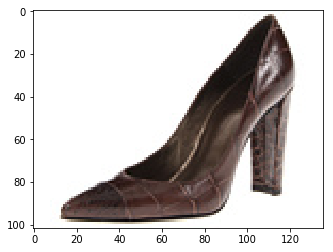

In [7]:
predict("./data/Shoes/Heels/Stuart Weitzman/8031389.210435.jpg")